# diverse development

pennlinckit contains data, plotting, brain, network science, and math functions common to neuroscience projects

In [1]:
import pennlinckit

standard libraries

In [2]:
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
data = pennlinckit.data.dataset('pnc')

In [4]:
data.load_matrices('rest')
data.matrix.shape

(1601, 400, 400)

(1629, 400, 400)

### First, let's load the Human Connectome Project Data

All datasets we have are objects. This makes them easy to load and manipulate. As you will see later, you can also pass the object to another part of the toolkit, and it will run the analysis and save the results to the data object.

In [3]:
# always going to be the same object class, regardless of dataset
hcp_data = pennlinckit.data.dataset(source='hcp')

You can always double check what dataset you called with:

In [4]:
hcp_data.source

'hcp'

All data objects will tell us a bit about how the data was created in the "methods" method:

In [5]:
hcp_data.methods()

The Resting-state, Working Memory, Language and Math, Relational, Social Cognition, Emotion, Gambling, and Motor fMRI scans from the S1200 Human Connectome Project release were analyzed. 
Brains were normalized to fslr32k via the MSM-AII registration.
CompCor, with five principal components from the ventricles and white matter masks, was used to regress out nuisance signals from the time series.
In addition, the 12 detrended motion estimates provided by the Human Connectome Project were regressed out from the regional time series.
The mean global signal was removed and then time series were band- pass filtered from 0.009 to 0.08 Hz.
Finally, frames with greater than 0.2 mm frame-wise displacement or a derivative root mean square (DVARS) above 75 were removed as outliers.
Segments of less than five uncensored time points were also removed. Sessions composed of greater than 50 percent outlier frames were not further analyzed.
Parcels: made using: https://github.com/ThomasYeoLab/CBIG/blob

All pennlinckit.data objects will have a "measures" object, which is basically the pandas dataframe of the csv type data we have for that dataset. This occurs when you create the class instance

In [6]:
hcp_data.measures.head(5)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


Let's just load the first 25 subjects, and then apply some inclusion criteria

In [7]:
hcp_data.subjects = hcp_data.subjects[:25]
hcp_data.load_matrices(task='WM',subcortex=False)
print(hcp_data.matrix.shape)
print(hcp_data.measures.shape)

(25, 400, 400)
(25, 582)


We can just filter based on if the subject has a matrix. Right now, in that big 1206x400x400 array, if the subject was missing (either because we scrubbed too much, or they did not complete the scan, the whole matrix is np.nan)

In [8]:
hcp_data.filter('matrix')
print(hcp_data.matrix.shape)
print(hcp_data.measures.shape)

(19, 400, 400)
(19, 582)


Let's check out a few other ways to remove subjects we do not want. Maybe we just care about subjects from a single release:

In [9]:
hcp_data.filter('==',value='S900',column='Release')
print(hcp_data.matrix.shape)
print(hcp_data.measures.shape)

(19, 400, 400)
(19, 582)


Let's only look at people who can smell really well

In [10]:
hcp_data.filter('>',value=100,column='Odor_AgeAdj')
print(hcp_data.matrix.shape)
print(hcp_data.measures.shape)

(6, 400, 400)
(6, 582)


### Let's quicky check out the pennlinckit.networks function. You just pass your data object to it, and it will make networks for each subject!

In [11]:
#lets start with a fresh object, all subjects, resting-state
hcp_data = pennlinckit.data.dataset(source='hcp')
hcp_data.subjects = hcp_data.subjects
hcp_data.load_matrices(task='*REST*')
hcp_data.filter('matrix')

So, now that we have our subjects that have a matrix, let's make some networks

In [12]:
hcp_data.subjects.shape

(1206,)

In [13]:
pennlinckit.network.make_networks(hcp_data,cores=10)

In [14]:
hcp_data.networks.graphs[0][0] #first subject, return igraph object at each density requested

In [15]:
hcp_data.networks.pc[0][0][:25] #first subject, first density, first 25 regions

array([0.58795969, 0.69855231, 0.19810925, 0.09437609, 0.40608837,
       0.40308925, 0.64570136, 0.72761895, 0.48580232, 0.70765481,
       0.72011632, 0.67870167, 0.67483766, 0.68455592, 0.80983602,
       0.6866214 , 0.48126836, 0.52917668, 0.51235792, 0.30560457,
       0.78488084, 0.65050521, 0.82391318, 0.809388  , 0.70992046])

In [43]:
hcp_data.networks.modularity.mean(axis=1)[:10] #we run a few densities, so get the mean across them for each sub

array([0.41680692, 0.41634684, 0.40809176, 0.37587459, 0.39913264,
       0.40992575, 0.40591412, 0.40672778, 0.4159276 , 0.41901334])

We can also look at the parameters for the graph theory stuff:

In [17]:
hcp_data.networks.costs, hcp_data.networks.binary

([0.15, 0.1, 0.05, 0.025, 0.01], False)

## PNC data

In [18]:
pnc_data = pennlinckit.data.dataset('pnc')
pnc_data.measures.head(5)

,bblid,scanid,sex,race,race2,ethnicity,ageAtClinicalAssess1,ageAtCnb1,ageAtScan1,edu1,fedu1,medu1,handednessv2
0,80010,2894,1,1,1,2,260,260,261,14,20.0,16.0,1
1,80179,2643,2,1,1,2,254,254,254,12,NaN,14.0,1
2,80199,2637,1,5,3,1,243,244,244,12,NaN,12.0,1
3,80208,3016,1,2,2,2,245,245,246,11,12.0,12.0,2
4,80249,2648,2,1,1,2,250,250,250,16,10.0,12.0,1


In [19]:
pnc_data.load_matrices()
pnc_data.matrix.shape

(1629, 400, 400)

In [20]:
pnc_data.filter('matrix')
pnc_data.matrix.shape

(1015, 400, 400)

In [21]:
#grab PNC subjects, assume yeo 7 community structure
pennlinckit.network.make_networks(pnc_data,cores=20,yeo_partition=7)

# We also have some one-off datasets, so we just load thse directly

## Allen Institute Gene Expression

In [22]:
abi = pennlinckit.data.allen_brain_institute()

In [23]:
print(abi.expression.shape,abi.names.shape)

(400, 10027) (10027,)


In [24]:
abi.names

array(['A1BG', 'A2M', 'SERPINA3', ..., 'LOC100506548', 'OCLN', 'MICA'],
      dtype='<U13')

## Evolutionary Expansion

In [25]:
evo = pennlinckit.data.evo_expansion()

## Gradient

In [26]:
gradient = pennlinckit.data.gradient()

# There is also a utils part of pennlinckit

Say you want to correate a 1D array with a 2D array, and you don't want to loop through:

In [27]:
x = pnc_data.networks.modularity.mean(axis=-1)

In [30]:
#let's see which connections are correlated with Q (modularity)
q_matrix_corr = np.zeros((400,400))
#intead of looping through each edge, we just have to loop through node's connections:
for region in range(pnc_data.matrix.shape[-1]):
    q_matrix_corr[region] = pennlinckit.utils.matrix_corr(pnc_data.matrix[:,region].transpose(),x)

<AxesSubplot:>

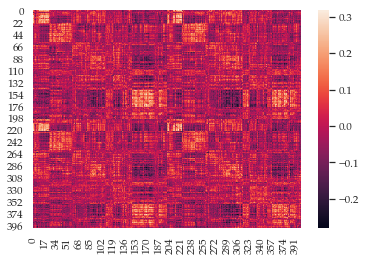

In [31]:
import matplotlib
%matplotlib inline
sns.heatmap(q_matrix_corr) #note that the default font is Palatino, Nature's default font (aim high!)

In [32]:
# hey, that result matrix looks sort of like the FC matrix, let's check
# never correlate the entire matrix if it's symmetric
upper = pennlinckit.utils.matrix_triu(400)
scipy.stats.pearsonr(q_matrix_corr[upper[0],upper[1]],pnc_data.matrix.mean(axis=0)[upper[0],upper[1]])

(0.5207237285493376, 0.0)

In [33]:
#say you have missing data (np.nan) somewhere:
pennlinckit.utils.nan_pearsonr(abi.expression.max(axis=1),\
                               pnc_data.networks.pc.mean(axis=0).mean(axis=0))

(-0.09868117740212418, 0.171020885650994)

# let's save out a cifti 

In [34]:
save_brain = np.nanmean(np.nanmean(pnc_data.networks.pc,axis=0),axis=0)

In [35]:
save_brain.shape

(400,)

In [36]:
save_brain = pennlinckit.brain.make_heatmap(save_brain) #using the stock colormap, but you can pass whatever you want

In [37]:
save_brain[0] #each region value is now an RBG

(0.9912341407151096, 0.8631295655517108, 0.7877739331026528)

In [38]:
pennlinckit.brain.write_cifti(save_brain,'pnc_pc')

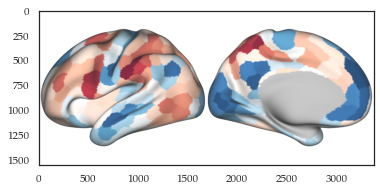

In [42]:
plt.imshow(plt.imread('pnc_pc.png'))